<a href="https://colab.research.google.com/github/Lightning-Nemesis/CSE572_DataMining_Assignment1/blob/main/RecSys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd

In [19]:
df = pd.read_csv('/content/ratings_small.csv')

In [20]:
df.shape

(100004, 4)

In [21]:
df.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [22]:
# pip install surprise

In [23]:
df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [24]:
df.dtypes

,0
userId,int64
movieId,int64
rating,float64
timestamp,int64


In [25]:
df = df[['userId', 'movieId', 'rating', 'timestamp']]
df.to_csv("ratings_no_header.csv", index=False, header=False)

In [15]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357282 sha256=320257c9232417657b9d0b2e7c6c9d9cf85a7798bd29f49153c9222561d4c76d
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [26]:
from surprise import Dataset, Reader
from surprise import SVD, KNNBasic
from surprise.model_selection import cross_validate

# Define a reader with the format: 'userID movieID rating timestamp'
reader = Reader(line_format='user item rating timestamp', sep=',')

# Load the data from the file
data = Dataset.load_from_file('/content/ratings_no_header.csv', reader=reader)

In [27]:
data.raw_ratings[:10]

[('1', '31', 2.5, '1260759144'),
 ('1', '1029', 3.0, '1260759179'),
 ('1', '1061', 3.0, '1260759182'),
 ('1', '1129', 2.0, '1260759185'),
 ('1', '1172', 4.0, '1260759205'),
 ('1', '1263', 2.0, '1260759151'),
 ('1', '1287', 2.0, '1260759187'),
 ('1', '1293', 2.0, '1260759148'),
 ('1', '1339', 3.5, '1260759125'),
 ('1', '1343', 2.0, '1260759131')]

###PMF

In [60]:
pmf_res = cross_validate(SVD(biased=False), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
pmf_res

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0142  1.0137  1.0099  1.0076  1.0087  1.0108  0.0027  
MAE (testset)     0.7847  0.7843  0.7776  0.7764  0.7777  0.7802  0.0036  
Fit time          2.48    1.64    2.04    1.51    1.44    1.82    0.39    
Test time         0.12    0.13    0.18    0.10    0.17    0.14    0.03    


{'test_rmse': array([1.01422592, 1.01369921, 1.00989964, 1.00758225, 1.0086612 ]),
 'test_mae': array([0.78474927, 0.78431606, 0.77764588, 0.77639123, 0.77772606]),
 'fit_time': (2.480722665786743,
  1.636038064956665,
  2.0373165607452393,
  1.511714220046997,
  1.4399304389953613),
 'test_time': (0.12479567527770996,
  0.12653899192810059,
  0.18106770515441895,
  0.10419297218322754,
  0.17498779296875)}

In [62]:
pmf_avg_rmse = sum(pmf_res['test_rmse']) / len(pmf_res['test_rmse'])
pmf_avg_mae = sum(pmf_res['test_mae']) / len(pmf_res['test_mae'])
print("PMF")
print("Average RMSE "+str(pmf_avg_rmse))
print("Average MAE "+str(pmf_avg_mae))

PMF
Average RMSE 1.0108136427066765
Average MAE 0.7801656988424919


### User-based

In [49]:
ub_res = cross_validate(KNNBasic(sim_options={'user_based': True}), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
ub_res

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9748  0.9758  0.9633  0.9699  0.9595  0.9687  0.0064  
MAE (testset)     0.7508  0.7476  0.7412  0.7453  0.7355  0.7441  0.0053  
Fit time          0.16    0.14    0.14    0.13    0.20    0.15    0.02    
Test time         1.82    1.43    1.39    1.68    1.40    1.54    0.18    


{'test_rmse': array([0.97477679, 0.97580093, 0.96333107, 0.96992486, 0.9594804 ]),
 'test_mae': array([0.75081678, 0.74758824, 0.74117276, 0.74532077, 0.73546921]),
 'fit_time': (0.16248822212219238,
  0.13869786262512207,
  0.13640952110290527,
  0.13452506065368652,
  0.19975996017456055),
 'test_time': (1.8232367038726807,
  1.4252309799194336,
  1.387740135192871,
  1.6755406856536865,
  1.4002048969268799)}

In [50]:
ub_avg_rmse = sum(ub_res['test_rmse']) / len(ub_res['test_rmse'])
ub_avg_mae = sum(ub_res['test_mae']) / len(ub_res['test_mae'])
print("UserBased")
print("Average RMSE "+str(ub_avg_rmse))
print("Average MAE "+str(ub_avg_mae))

UserBased
Average RMSE 0.9686628105843657
Average MAE 0.7440735525442876


### Item Based

In [51]:
ib_res = cross_validate(KNNBasic(sim_options={'user_based': False}), data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
ib_res

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9372  0.9374  0.9360  0.9307  0.9328  0.9348  0.0026  
MAE (testset)     0.7233  0.7197  0.7191  0.7206  0.7213  0.7208  0.0015  
Fit time          4.04    4.44    4.07    4.01    4.14    4.14    0.16    
Test time         8.02    7.89    7.88    7.71    7.12    7.72    0.32    


{'test_rmse': array([0.93715451, 0.93743295, 0.93596582, 0.93065987, 0.93284604]),
 'test_mae': array([0.72333671, 0.71971189, 0.71908069, 0.72058324, 0.72131175]),
 'fit_time': (4.0367372035980225,
  4.443144083023071,
  4.068829536437988,
  4.014749765396118,
  4.144926309585571),
 'test_time': (8.02074646949768,
  7.886355400085449,
  7.883433818817139,
  7.712974548339844,
  7.115234136581421)}

In [52]:
ib_avg_rmse = sum(ib_res['test_rmse']) / len(ib_res['test_rmse'])
ib_avg_mae = sum(ib_res['test_mae']) / len(ib_res['test_mae'])
print("ItemBased")
print("Average RMSE "+str(ib_avg_rmse))
print("Average MAE "+str(ib_avg_mae))

ItemBased
Average RMSE 0.9348118406495262
Average MAE 0.7208048566297217


### Similarity

In [57]:
#User based
ub_MSD = cross_validate(KNNBasic(sim_options={'name':'MSD','user_based': True}), data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
ub_cosine = cross_validate(KNNBasic(sim_options={'name':'cosine','user_based': True}), data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
ub_pearson = cross_validate(KNNBasic(sim_options={'name':'pearson_baseline','user_based': True}), data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases usi

In [62]:
#Item based
ib_MSD = cross_validate(KNNBasic(sim_options={'name':'MSD','user_based': False}), data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
ib_cosine = cross_validate(KNNBasic(sim_options={'name':'cosine','user_based': False}), data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
ib_pearson = cross_validate(KNNBasic(sim_options={'name':'pearson_baseline','user_based': False}), data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases usi

In [63]:
ub_MSD_avg_rmse = sum(ub_MSD['test_rmse']) / len(ub_MSD['test_rmse'])
ub_MSD_avg_mae = sum(ub_MSD['test_mae']) / len(ub_MSD['test_mae'])
ub_cosine_avg_rmse = sum(ub_cosine['test_rmse']) / len(ub_cosine['test_rmse'])
ub_cosine_avg_mae = sum(ub_cosine['test_mae']) / len(ub_cosine['test_mae'])
ub_pearson_avg_rmse = sum(ub_pearson['test_rmse']) / len(ub_pearson['test_rmse'])
ub_pearson_avg_mae = sum(ub_pearson['test_mae']) / len(ub_pearson['test_mae'])
print("UserBased")
print("MSD -----> " + str(ub_MSD_avg_rmse)+" "+str(ub_MSD_avg_mae))
print("Cosine --> " + str(ub_cosine_avg_rmse)+" "+str(ub_cosine_avg_mae))
print("Pearson -> " + str(ub_pearson_avg_rmse)+" "+str(ub_pearson_avg_mae))

print()
ib_MSD_avg_rmse = sum(ib_MSD['test_rmse']) / len(ib_MSD['test_rmse'])
ib_MSD_avg_mae = sum(ib_MSD['test_mae']) / len(ib_MSD['test_mae'])
ib_cosine_avg_rmse = sum(ib_cosine['test_rmse']) / len(ib_cosine['test_rmse'])
ib_cosine_avg_mae = sum(ib_cosine['test_mae']) / len(ib_cosine['test_mae'])
ib_pearson_avg_rmse = sum(ib_pearson['test_rmse']) / len(ib_pearson['test_rmse'])
ib_pearson_avg_mae = sum(ib_pearson['test_mae']) / len(ib_pearson['test_mae'])
print("UserBased")
print("MSD -----> " + str(ib_MSD_avg_rmse)+" "+str(ib_MSD_avg_mae))
print("Cosine --> " + str(ib_cosine_avg_rmse)+" "+str(ib_cosine_avg_mae))
print("Pearson -> " + str(ib_pearson_avg_rmse)+" "+str(ib_pearson_avg_mae))

UserBased
MSD -----> 0.9672221985233069 0.7431524511822993
Cosine --> 0.9921007987477486 0.7662275590253932
Pearson -> 0.9977202331452629 0.7706267186849854

UserBased
MSD -----> 0.9349179932098108 0.7208481933298553
Cosine --> 0.9951003327465177 0.774581688489558
Pearson -> 0.9407076900627388 0.7124622740708026


In [112]:
metrics=['MSD', 'Cosine', 'Pearson']
ub_rmse =[ub_MSD_avg_rmse, ub_cosine_avg_rmse, ub_pearson_avg_rmse]
ub_mae =[ub_MSD_avg_mae, ub_cosine_avg_mae, ub_pearson_avg_mae]
ib_rmse =[ib_MSD_avg_rmse, ib_cosine_avg_rmse, ib_pearson_avg_rmse]
ib_mae =[ib_MSD_avg_mae, ib_cosine_avg_mae, ib_pearson_avg_mae]

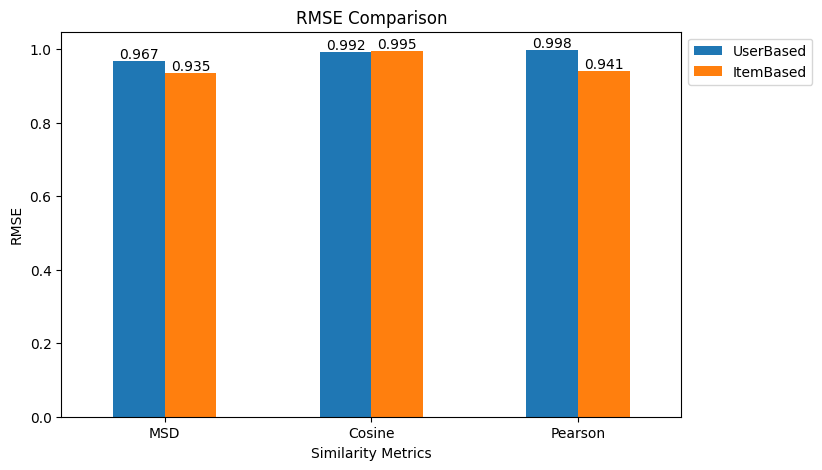

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

plot_df = pd.DataFrame({'Metrics': metrics, 'UserBased': ub_rmse, 'ItemBased': ib_rmse})

ax = plot_df.plot(x='Metrics', kind='bar', figsize=(8, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=10)
plt.xlabel("Similarity Metrics")
plt.ylabel("RMSE")
plt.title("RMSE Comparison")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

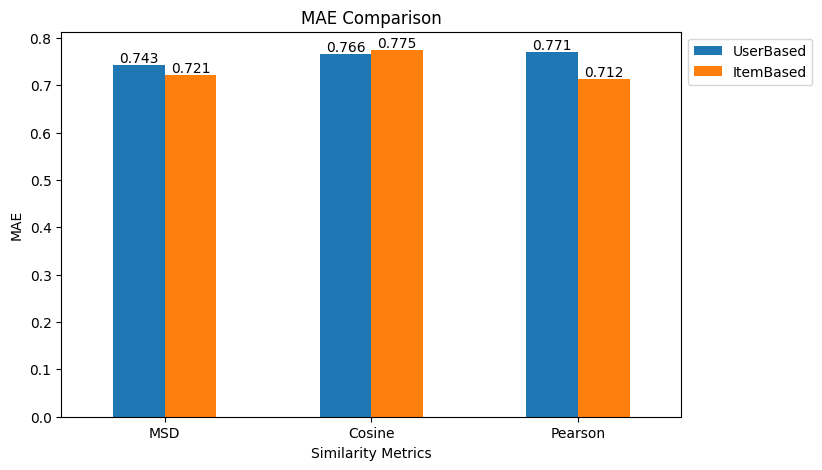

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

plot_df = pd.DataFrame({'Metrics': metrics, 'UserBased': ub_mae, 'ItemBased': ib_mae})

ax = plot_df.plot(x='Metrics', kind='bar', figsize=(8, 5))
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', fontsize=10)
plt.xlabel("Similarity Metrics")
plt.ylabel("MAE")
plt.title("MAE Comparison")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)
plt.show()

### Number of Neighbors

In [63]:
#User based
ub_rmse_scores = []
ub_mae_scores = []
for k in range(1,51):
    res = cross_validate(KNNBasic(k=k, sim_options={'user_based': True}), data, measures=['RMSE','MAE'], cv=5, verbose=False)
    ub_rmse_scores.append(res['test_rmse'].mean())
    ub_mae_scores.append(res['test_mae'].mean())

ib_rmse_scores = []
ib_mae_scores = []
for k in range(1,51):
    res = cross_validate(KNNBasic(k=k, sim_options={'user_based': False}), data, measures=['RMSE','MAE'], cv=5, verbose=False)
    ib_rmse_scores.append(res['test_rmse'].mean())
    ib_mae_scores.append(res['test_mae'].mean())

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

In [64]:
print(ub_rmse_scores)
print(ib_rmse_scores)
print(ub_mae_scores)
print(ib_mae_scores)

[1.2102203408442946, 1.0753020200175432, 1.0245672199282458, 0.9991786918009579, 0.9863721296532951, 0.9776056247282747, 0.9727846157370399, 0.9685734054268572, 0.9681521826864218, 0.9627600811705568, 0.9640650906685544, 0.9629404258219459, 0.9618194871865716, 0.9623612420797739, 0.9607249436468981, 0.9627301871044297, 0.9629796015052913, 0.9616987913537989, 0.9629564106673494, 0.9620361763848548, 0.9618485246752986, 0.9630976038673762, 0.9618862055522988, 0.9637699539868212, 0.9635583713541974, 0.9638641896778601, 0.9647055753599345, 0.9639043762530841, 0.9655960404195391, 0.9647723503529482, 0.9658825759325749, 0.9657857685728862, 0.9693176249613407, 0.9674789737306453, 0.9682226261952049, 0.9671600529948684, 0.9672016677124565, 0.9673128743517723, 0.9674206108337197, 0.9688428274632404, 0.9696388971883232, 0.9684744783286703, 0.9710744899449105, 0.9678687997634086, 0.9696205660653577, 0.9671483349307053, 0.9698256908299381, 0.9703022501091423, 0.9690022352207753, 0.9690506769558832]

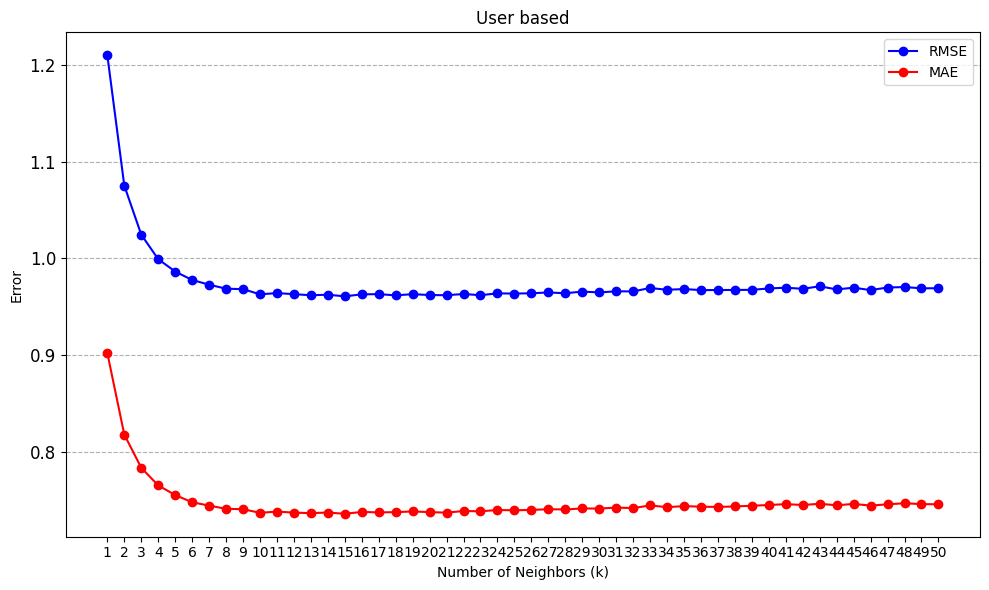

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1,51)], ub_rmse_scores, marker='o', label='RMSE', color='blue')
plt.plot([i for i in range(1,51)], ub_mae_scores, marker='o', label='MAE', color='red')

plt.title('User based')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.xticks([i for i in range(1,51)])
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.legend()

plt.tight_layout()
plt.show()

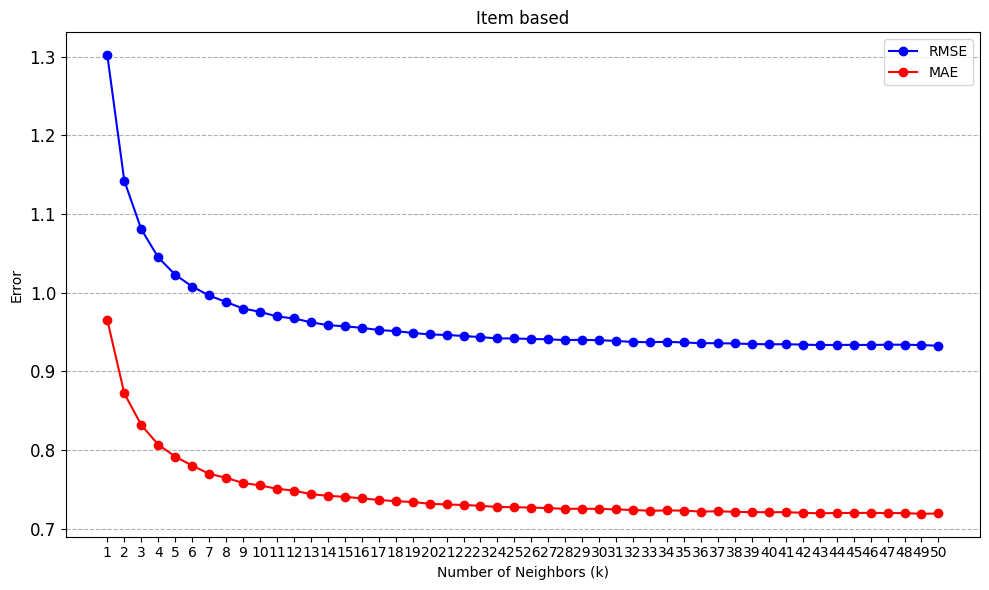

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1,51)], ib_rmse_scores, marker='o', label='RMSE', color='blue')
plt.plot([i for i in range(1,51)], ib_mae_scores, marker='o', label='MAE', color='red')

plt.title('Item based')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error')
plt.xticks([i for i in range(1,51)])
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

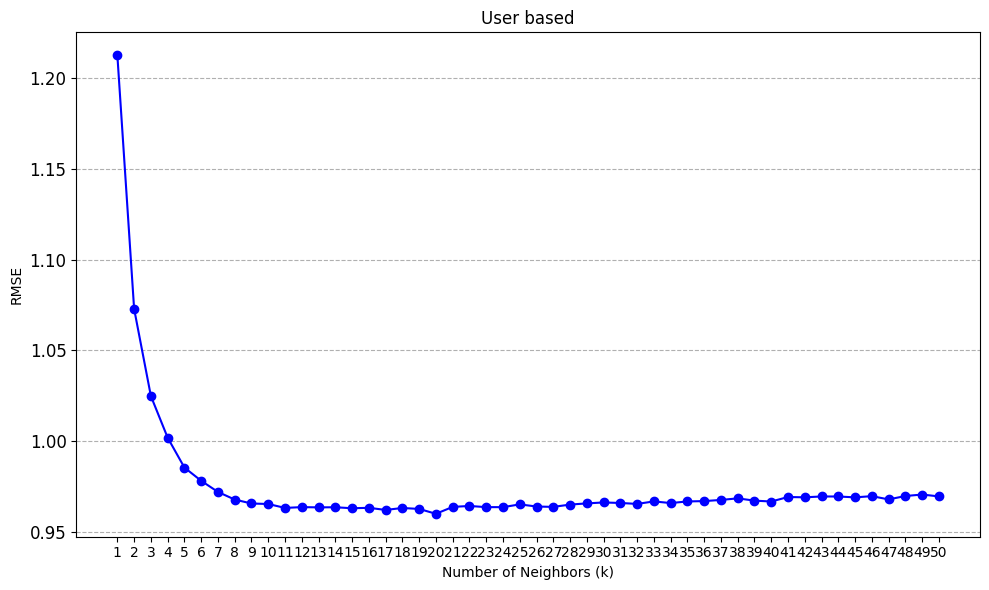

In [82]:
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1,51)], ub_rmse_scores, marker='o', label='RMSE', color='blue')

plt.title('User based')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.xticks([i for i in range(1,51)])
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

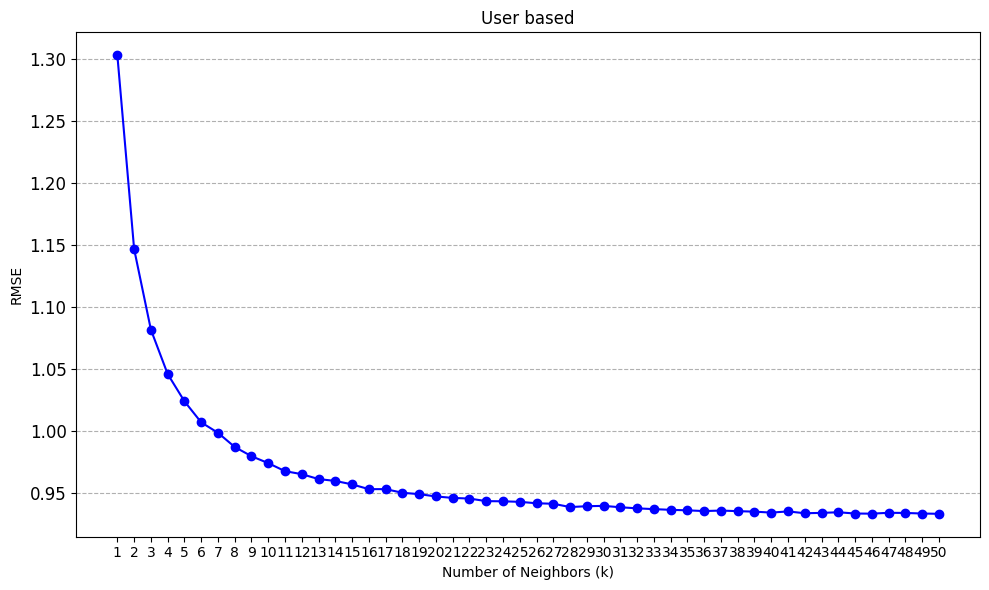

In [83]:
plt.figure(figsize=(10, 6))
plt.plot([i for i in range(1,51)], ib_rmse_scores, marker='o', label='RMSE', color='blue')

plt.title('User based')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.xticks([i for i in range(1,51)])
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()

In [69]:
ib_rmse_scores.index(min(ib_rmse_scores))

49